In [ ]:
!pip install pandas matplotlib seaborn python-dotenv langchain langchain-core langchain-community langchain-openai langchain-chroma transformers[torch] streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 108.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 100.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.7 MB/s eta 0:00:

In [ ]:
import pandas as pd
from matplotlib.pyplot import plot_date

import warnings
warnings.filterwarnings('ignore')

# Read the data

* isbn13 : ISBN 13 Identifier
* isbn10: ISBN 10 Identifier
* title : Title of book
* subtitle : Subtitle of book
* authors : Authors of book separated by ";"
* categories : Categories separated by ";"
* thumbnail : URL of thumbnail
* description : Description of book
* published_year : Year of publication
* average_rating : Average rating in Goodreads
* num_pages : Number of pages
* rating_count : No of rating provided.

In [ ]:
df = pd.read_csv('/content/books.csv')
df.head(5)

isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.google.com/books/content?id=FKo2T...   
4  http://books.google.com/books/content?id=XhQ5X...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2  Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   

   average_rating  num_pages  ratings_count  
0            3.85      247.0          361.0  
1            3.83      241.0         5164.0  
2            3.97      479.0          172.0  
3            3.93      512.0        29532.0  
4            4.15      170.0        33684.0

# Data Exploration

1. Quick‐look & Shape

Insight: how many users×items (rows) you have, and what columns/features are present.

In [ ]:
df.shape     # (n_rows, n_columns)

(6810, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   isbn13                  6810 non-null   int64  
 1   isbn10                  6810 non-null   object 
 2   title                   6810 non-null   object 
 3   subtitle                2381 non-null   object 
 4   authors                 6738 non-null   object 
 5   categories              6711 non-null   object 
 6   thumbnail               6481 non-null   object 
 7   description             6548 non-null   object 
 8   published_year          6804 non-null   float64
 9   average_rating          6767 non-null   float64
 10  num_pages               6767 non-null   float64
 11  ratings_count           6767 non-null   float64
 12  average_rating_rounded  6767 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 691.8+ KB


2.  Missing Values

Insight:

Where you have NaNs—and how many—so you can decide whether to impute, drop, or treat “cold‐start” cases specially.


In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)

In [ ]:
missing

subtitle          4429
thumbnail          329
description        262
categories          99
authors             72
average_rating      43
ratings_count       43
num_pages           43
published_year       6
title                0
isbn13               0
isbn10               0
dtype: int64

3. Duplicate Rows

Insight:

Often Kaggle datasets may contain exact duplicates—removing them ensures you don’t double-count an interaction.

In [ ]:
dups = df.duplicated().sum()
dups

np.int64(0)

4. Summary Statistics (Numeric)

Insight:

For numeric columns (e.g. ratings, timestamps), you get min/median/max, so you can spot out‐of‐range values (did anyone rate >5?).

In [ ]:
df.describe()

isbn13  published_year  average_rating    num_pages  \
count  6.810000e+03     6804.000000     6767.000000  6767.000000   
mean   9.780677e+12     1998.630364        3.933284   348.181026   
std    6.068911e+08       10.484257        0.331352   242.376783   
min    9.780002e+12     1853.000000        0.000000     0.000000   
25%    9.780330e+12     1996.000000        3.770000   208.000000   
50%    9.780553e+12     2002.000000        3.960000   304.000000   
75%    9.780810e+12     2005.000000        4.130000   420.000000   
max    9.789042e+12     2019.000000        5.000000  3342.000000   

       ratings_count  
count   6.767000e+03  
mean    2.106910e+04  
std     1.376207e+05  
min     0.000000e+00  
25%     1.590000e+02  
50%     1.018000e+03  
75%     5.992500e+03  
max     5.629932e+06

In [ ]:
df.describe().T

count          mean           std           min  \
isbn13          6810.0  9.780677e+12  6.068911e+08  9.780002e+12   
published_year  6804.0  1.998630e+03  1.048426e+01  1.853000e+03   
average_rating  6767.0  3.933284e+00  3.313516e-01  0.000000e+00   
num_pages       6767.0  3.481810e+02  2.423768e+02  0.000000e+00   
ratings_count   6767.0  2.106910e+04  1.376207e+05  0.000000e+00   

                         25%           50%           75%           max  
isbn13          9.780330e+12  9.780553e+12  9.780810e+12  9.789042e+12  
published_year  1.996000e+03  2.002000e+03  2.005000e+03  2.019000e+03  
average_rating  3.770000e+00  3.960000e+00  4.130000e+00  5.000000e+00  
num_pages       2.080000e+02  3.040000e+02  4.200000e+02  3.342000e+03  
ratings_count   1.590000e+02  1.018000e+03  5.992500e+03  5.629932e+06

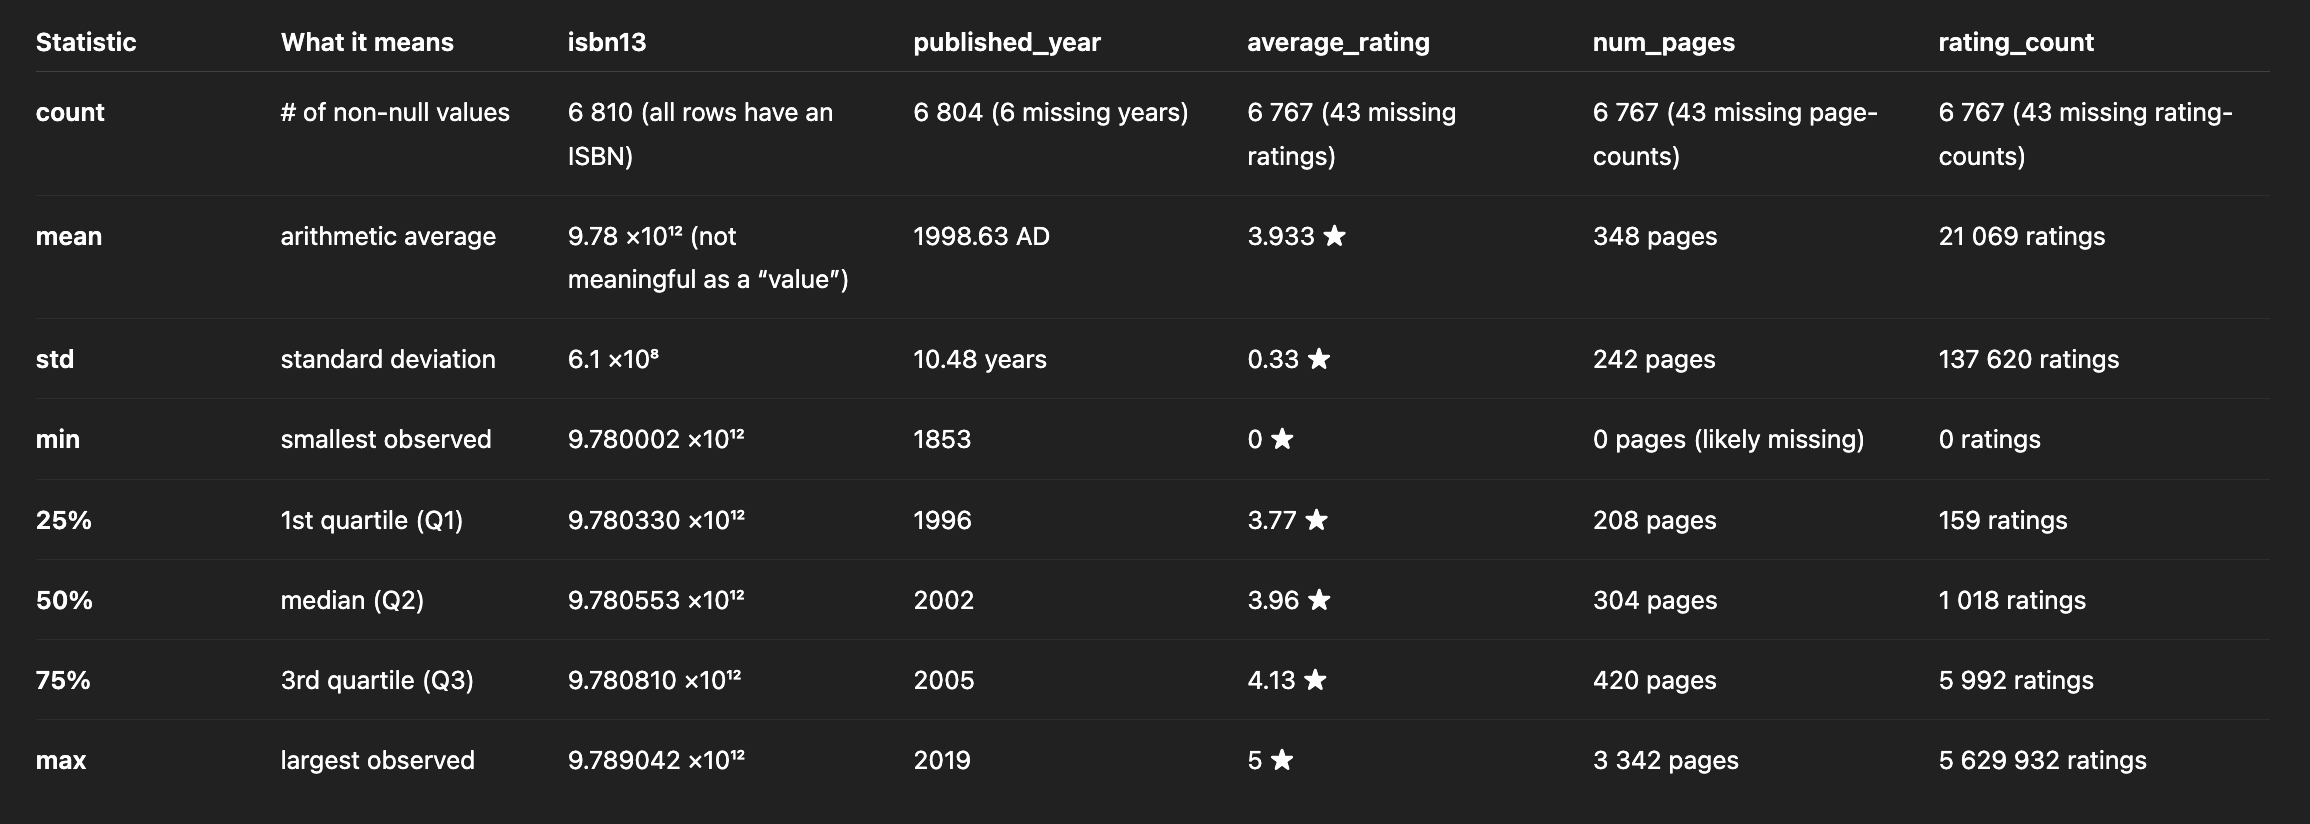

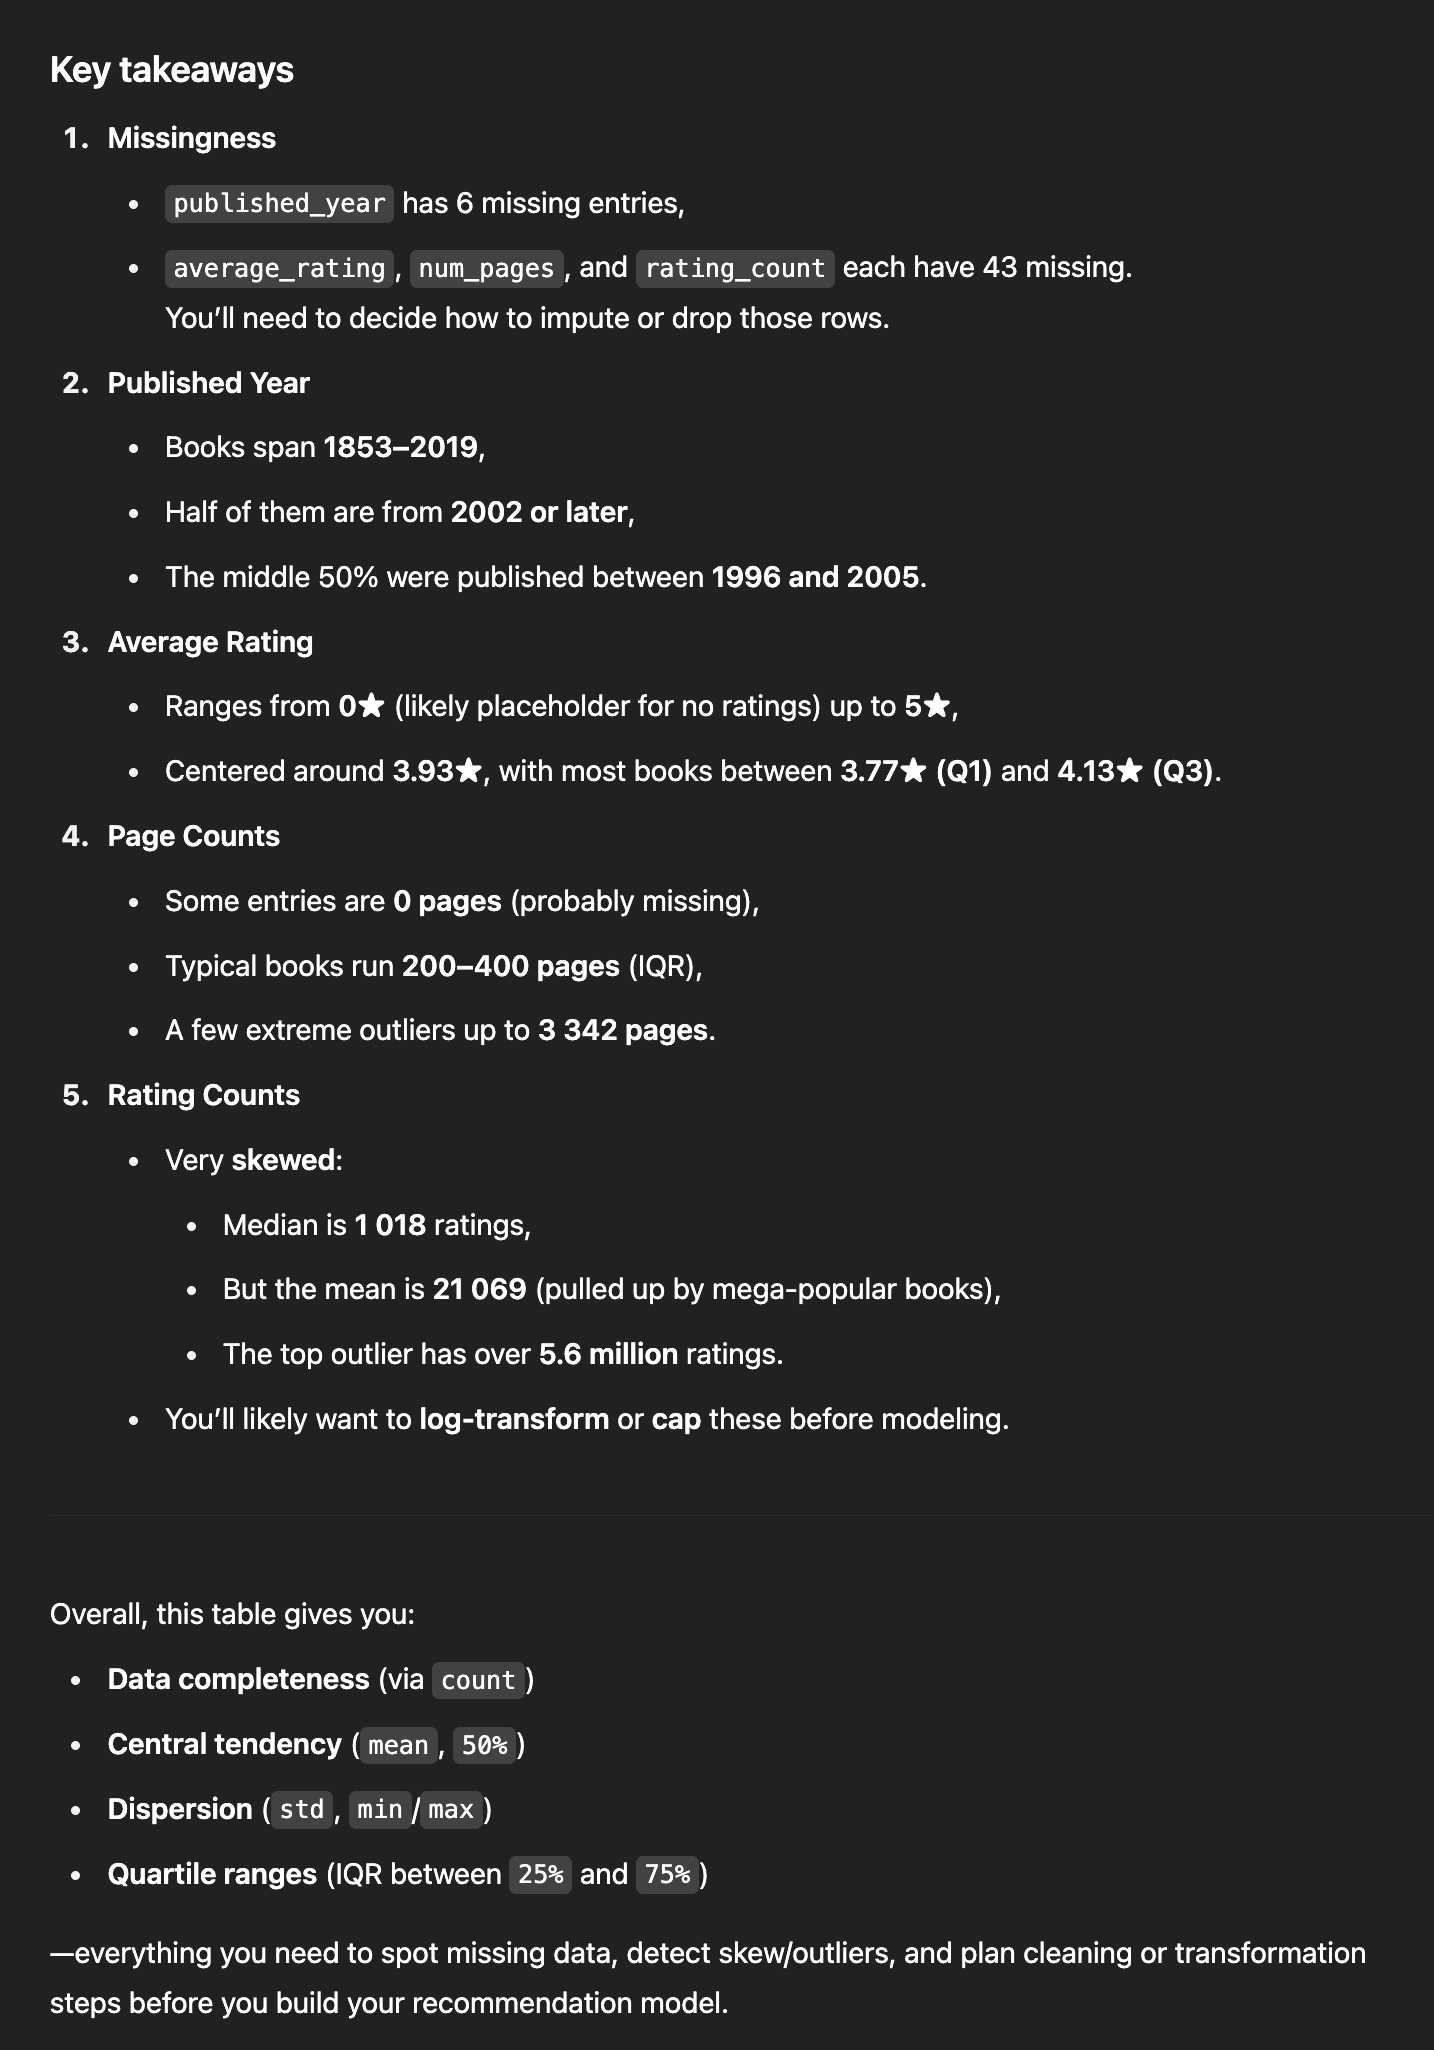

Insight:

Are there books with 0 pages?

Are there ratings >5 or <0?

How skewed is your rating_count—few books may have tons of reviews while most have very few.

In [ ]:
df[["published_year","average_rating","num_pages","ratings_count"]].describe().T

count          mean            std     min      25%      50%  \
published_year  6804.0   1998.630364      10.484257  1853.0  1996.00  2002.00   
average_rating  6767.0      3.933284       0.331352     0.0     3.77     3.96   
num_pages       6767.0    348.181026     242.376783     0.0   208.00   304.00   
ratings_count   6767.0  21069.099897  137620.678647     0.0   159.00  1018.00   

                    75%        max  
published_year  2005.00     2019.0  
average_rating     4.13        5.0  
num_pages        420.00     3342.0  
ratings_count   5992.50  5629932.0

5. Categorical & Unique‐value Counts

Insight:

How many unique users and unique items → helps you compute sparsity:

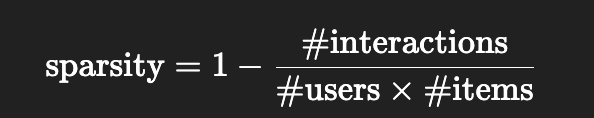

For other categoricals (genres, categories), you see cardinality and can decide on encoding strategies.

In [ ]:
for col in ["title", "subtitle", "authors", "categories", "description"]:
  print(col, df[col].nunique())

title 6398
subtitle 2009
authors 3780
categories 567
description 6474


6. Rating Distribution

Insight:

Are ratings skewed (most 5★? most 1★?), is there a neutral central tendency. That affects how you normalize or threshold.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

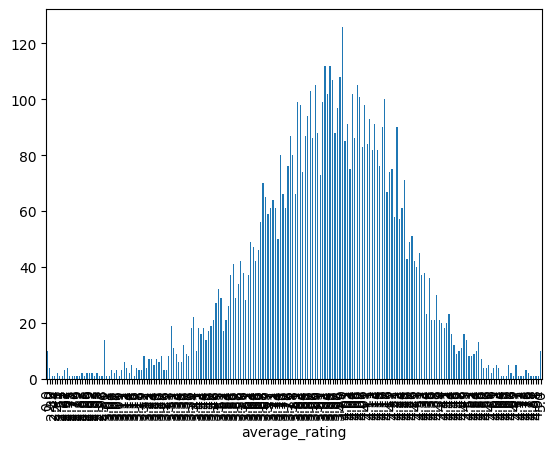

In [ ]:
df["average_rating"].value_counts().sort_index().plot.bar()
plt.show()

7. Distribution of Ratings & Rating Counts

Insight:

Does Goodreads bias toward high ratings?

How long is the “long tail” of low-review books?

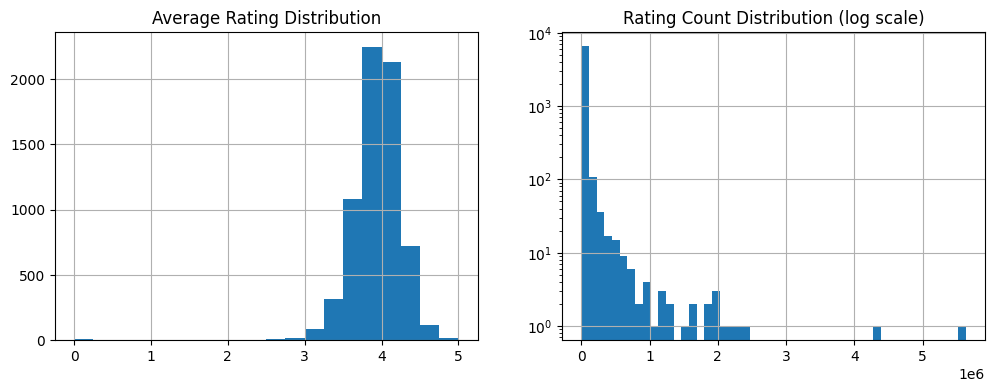

In [ ]:

fig, axes = plt.subplots(1,2, figsize=(12,4))
df["average_rating"].hist(ax=axes[0], bins=20)
axes[0].set_title("Average Rating Distribution")
df["ratings_count"].hist(ax=axes[1], bins=50)
axes[1].set_title("Rating Count Distribution (log scale)")
axes[1].set_yscale("log")
plt.show()

8. Year of Publication Trends

Insight:

Identify eras with peaks (e.g., recent years vs. classics).

Helps decide if you need to bin years or treat “old vs. new” differently.

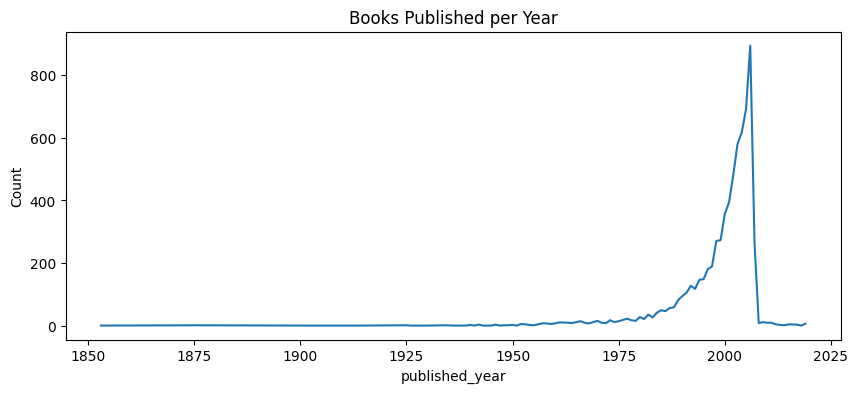

In [ ]:

df["published_year"].value_counts().sort_index().plot(figsize=(10,4))
plt.title("Books Published per Year")
plt.ylabel("Count")
plt.show()

9.  Text‐based Features: Description Length

Insight:

Extremely short (or missing) descriptions may hurt NLP-based recommenders—flag or impute them.



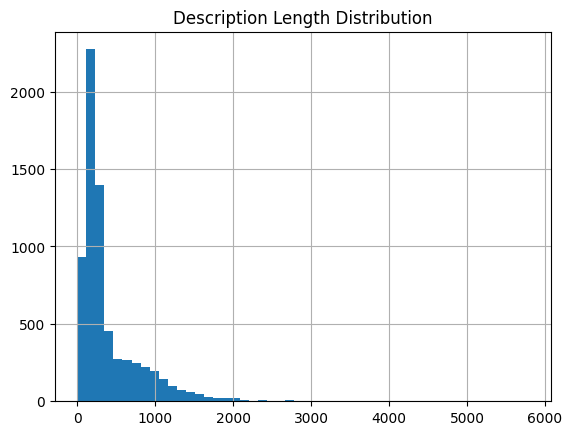

In [ ]:

df["desc_len"] = df["description"].fillna("").str.len()
df["desc_len"].describe()
df["desc_len"].hist(bins=50)
plt.title("Description Length Distribution"); plt.show()

10. Authors & Categories Cardinality

In [ ]:
# explode authors
authors = df["authors"].str.split(";").explode().str.strip()
print("Unique authors:", authors.nunique())
print("Top 10 authors by book count:\n", authors.value_counts().head(10))

print("==============================")

# explode categories
cats = df["categories"].str.split(";").explode().str.strip()
print("Unique categories:", cats.nunique())
print("Top 10 categories:\n", cats.value_counts().head(10))


Unique authors: 4470
Top 10 authors by book count:
 authors
William Shakespeare          50
Stephen King                 44
Agatha Christie              39
John Ronald Reuel Tolkien    35
Virginia Woolf               28
Janet Evanovich              25
Sandra Brown                 25
Mercedes Lackey              25
Margaret Weis                24
Plato                        22
Name: count, dtype: int64
Unique categories: 567
Top 10 categories:
 categories
Fiction                      2588
Juvenile Fiction              538
Biography & Autobiography     401
History                       264
Literary Criticism            166
Philosophy                    160
Comics & Graphic Novels       159
Religion                      137
Drama                         132
Juvenile Nonfiction           116
Name: count, dtype: int64


11. Distribution of Page Counts

Insight:

Are there extremely short (e.g. < 10 pages) or super-long (e.g. > 1000 pages) books?

You may choose to log-transform num_pages or cap extremes to stabilize models.



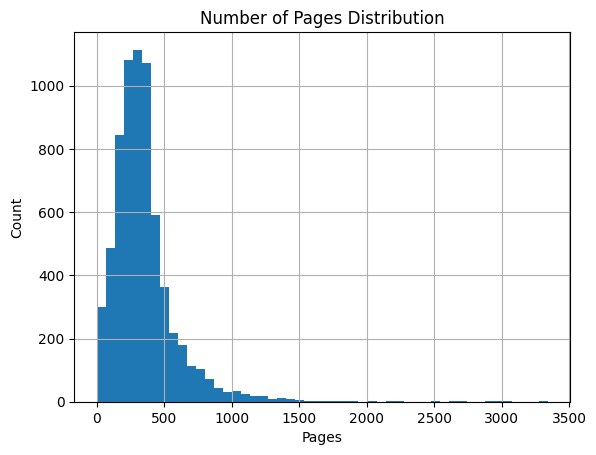

In [ ]:
df["num_pages"].hist(bins=50)
plt.title("Number of Pages Distribution")
plt.xlabel("Pages")
plt.ylabel("Count")
plt.show()


11. Pages ↔ Average Rating Relationship

Insight:

Do longer books tend to get higher or lower ratings?

If there’s a clear trend, you can use num_pages as a signal in a hybrid recommender.



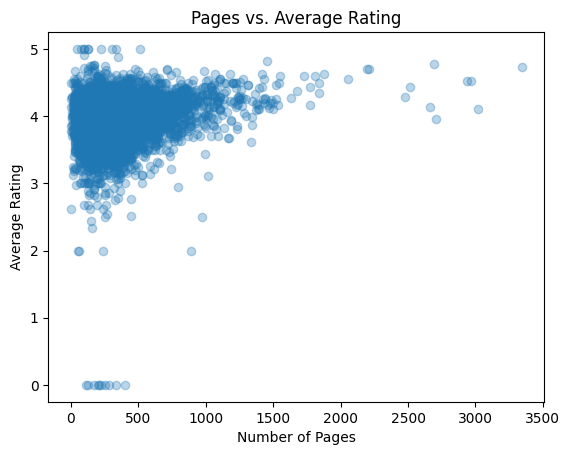

In [ ]:
plt.scatter(df["num_pages"], df["average_rating"], alpha=0.3)
plt.title("Pages vs. Average Rating")
plt.xlabel("Number of Pages")
plt.ylabel("Average Rating")
plt.show()


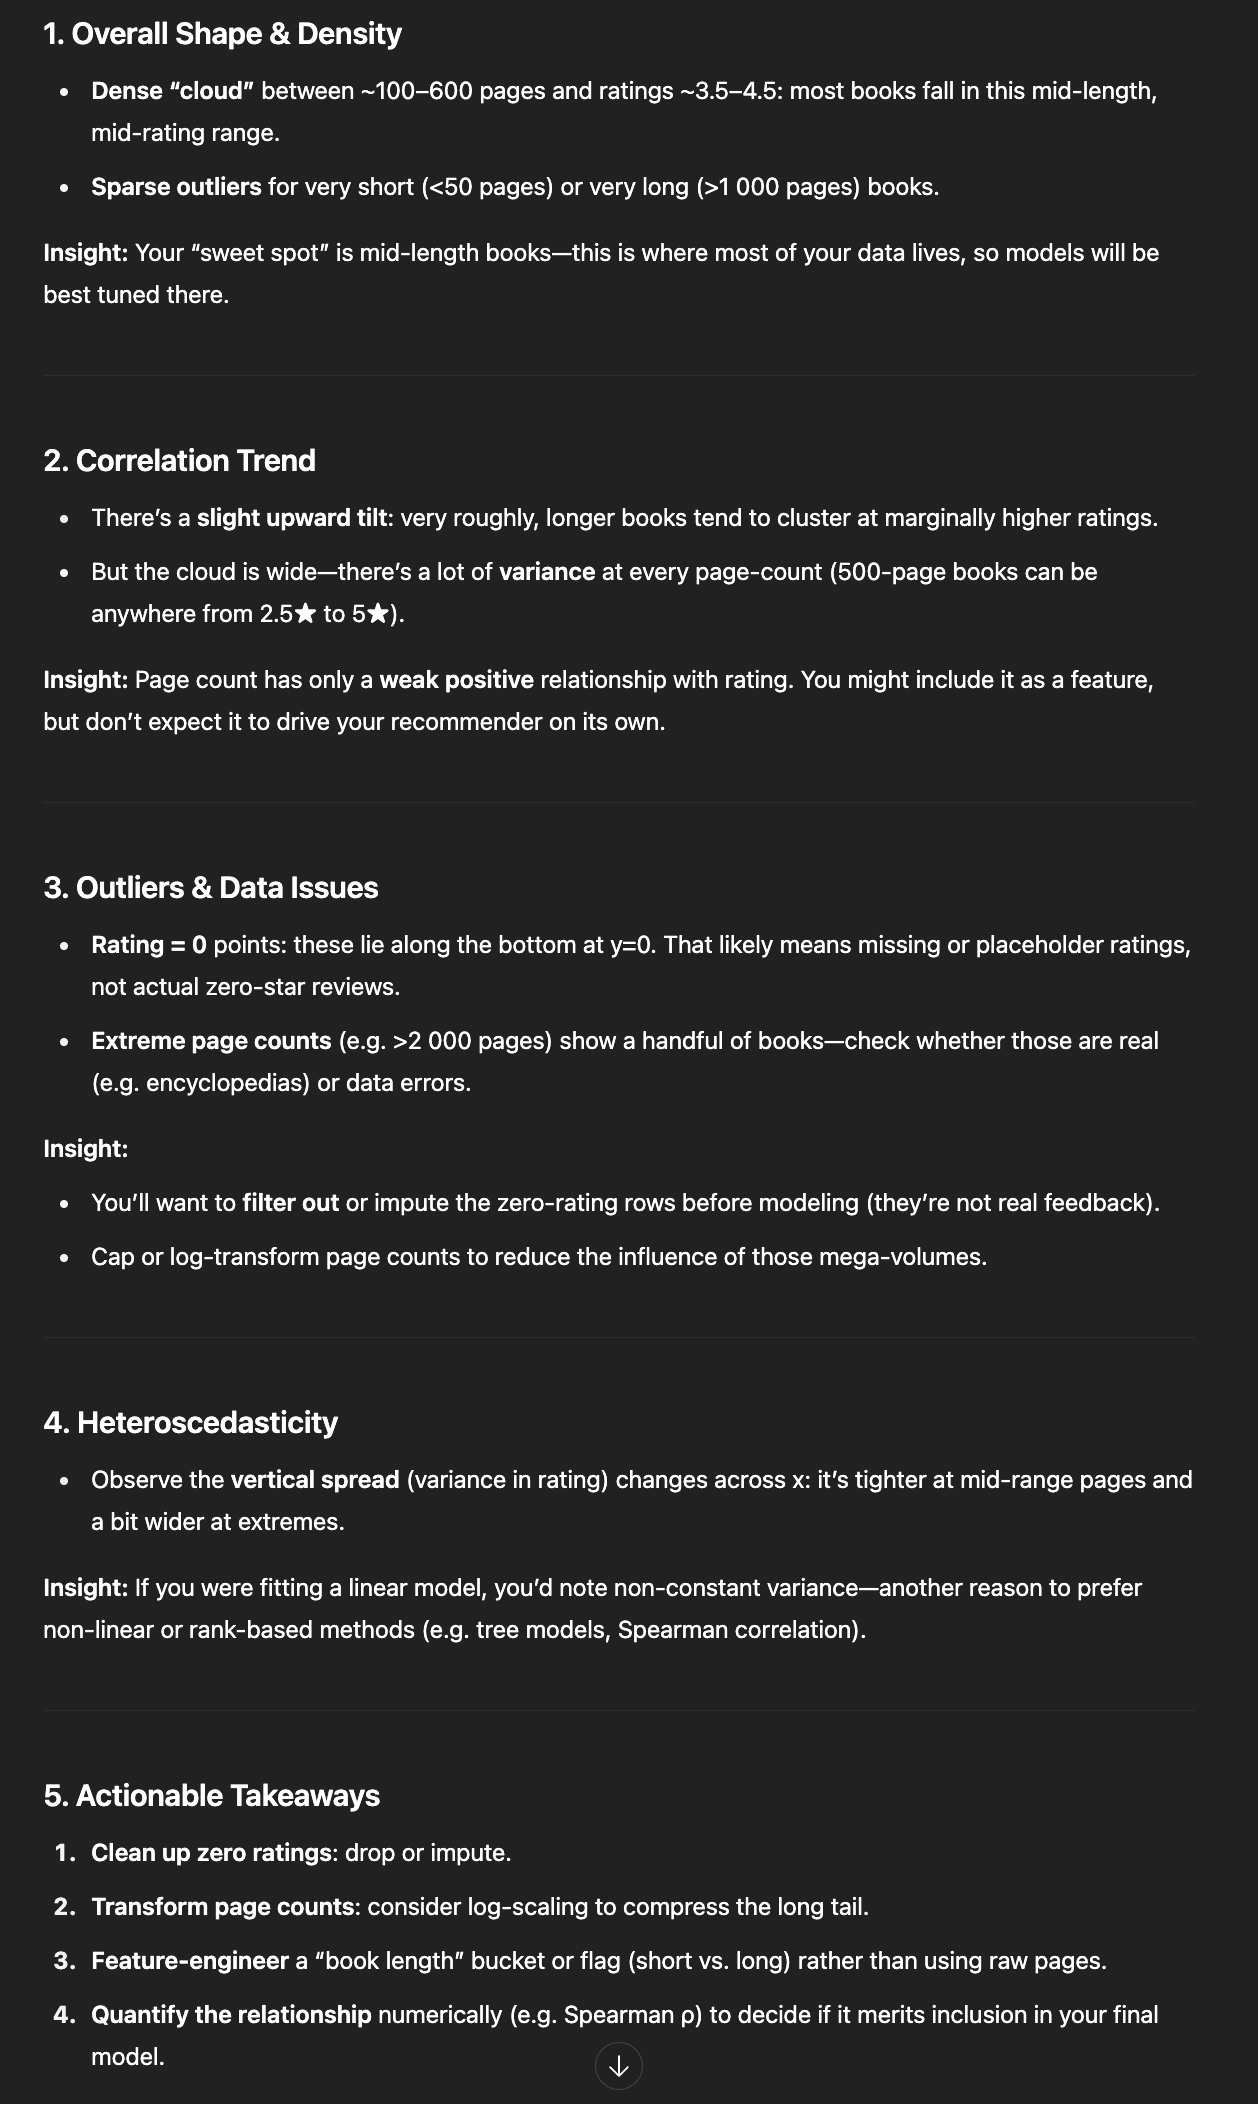

12. Rating Count ↔ Average Rating

Insight:

Often, books with very few ratings (cold-start) have more extreme average scores.

You might want to treat low-rating_count books differently (e.g. shrink their average toward the global mean).

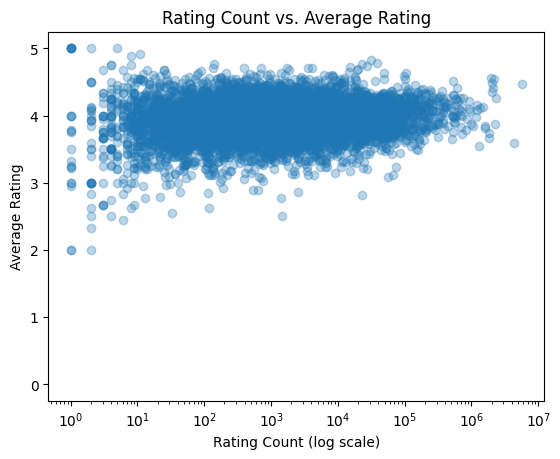

In [ ]:
plt.scatter(df["ratings_count"], df["average_rating"], alpha=0.3)
plt.xscale("log")
plt.title("Rating Count vs. Average Rating")
plt.xlabel("Rating Count (log scale)")
plt.ylabel("Average Rating")
plt.show()


13. Correlation Matrix of Numerics

Insight:

Spot multicollinearity (e.g. if rating_count and desc_len are highly correlated) before fitting models.

In [ ]:
import seaborn as sns

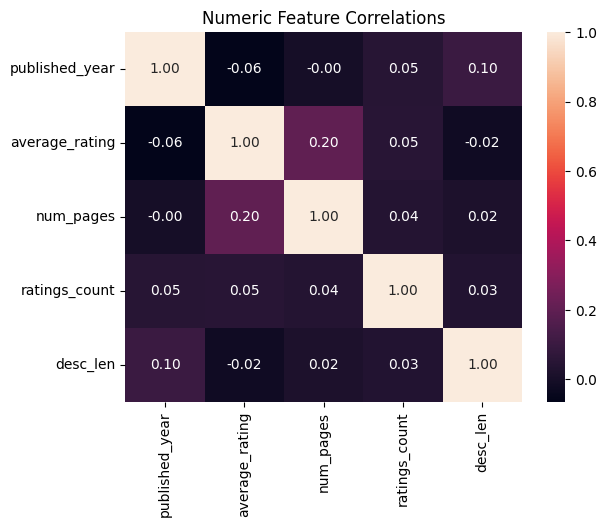

In [ ]:
num_cols = ["published_year","average_rating","num_pages","ratings_count","desc_len"]
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Numeric Feature Correlations")
plt.show()


14, Unique categories

In [ ]:
unique_subcats = (
    df["categories"]
    .str.split(";")          # split each string into a list
    .explode()               # turn each list element into its own row
    .str.strip()             # remove leading/trailing whitespace
    .dropna()                # drop any empty/null entries
    .unique()                # pull out the unique values
)
print(unique_subcats)


['Fiction' 'Detective and mystery stories' 'American fiction'
 'Christian life' 'Authors, English' 'Africa, East'
 'Hyland, Morn (Fictitious character)' 'Adventure stories'
 'Arthurian romances' 'Fantasy fiction' 'English drama' 'Country life'
 'English fiction' 'Clergy' 'Aubrey, Jack (Fictitious character)'
 'Detective and mystery stories, English' 'Black Death' 'Human cloning'
 'Science fiction' 'Great Britain' 'American essays' 'China' 'Capitalism'
 'Ireland' 'Juvenile Fiction' "Children's stories, English"
 'Male friendship' 'Literary Collections'
 'Beresford, Tommy (Fictitious character)' 'Imaginary wars and battles'
 'Dysfunctional families' 'Poirot, Hercule (Fictitious character)'
 'Christmas stories' 'Marple, Jane (Fictitious character)' 'Belgians'
 'Battle, Superintendent (Fictitious character)'
 'Baggins, Frodo (Fictitious character)' 'Cambridge (Mass.)'
 'Business enterprises' 'Emotional problems'
 'Characters and characteristics in motion pictures'
 'Fantasy fiction, Englis

In [ ]:
for cat in sorted(unique_subcats):
    print(cat)


87th Precinct (Imaginary place)
Abandoned mines
Aboriginal Australians
Abused wives
Accidents
Acting
Actors
Actors and actresses
Actresses
Adirondack Mountains (N.Y.)
Adjustment (Psychology)
Adolescence
Adult children
Adult education
Adultery
Adventure fiction
Adventure stories
Adventure stories, American
Adventure stories, English
Advertising
Aeneas (Legendary character)
Aeronautics
Africa, East
African American families
African American men
African American plantation owners
African Americans
African Americans in radio broadcasting
Aged women
Aging
Agriculture
Air pilots
Aircraft accidents
Airplane crash survival
Alanna (Fictitious character : Pierce)
Albigenses
Alcestis (Greek mythology)
Alcoholics
Alienation (Social psychology)
Allegories
Alternative histories (Fiction)
Alzheimer's disease
Amazon River Region
American Wit And Humour
American drama
American essays
American fiction
American literature
American poetry
American wit and humor
American wit and humor, Pictorial
Americans


In [ ]:
subcat_series = pd.Series(unique_subcats, name="subcategory")
display(subcat_series.to_frame().sort_values("subcategory").reset_index(drop=True))


subcategory
0                  87th Precinct (Imaginary place)
1                                  Abandoned mines
2                           Aboriginal Australians
3                                     Abused wives
4                                        Accidents
..                                             ...
562         Yoknapatawpha County (Imaginary place)
563                            Young Adult Fiction
564                              Zero (The number)
565                                        Zoology
566  Écrivains français - 18e siècle - Biographies

[567 rows x 1 columns]

# outliers detection

1. Boxplot

What it shows:

The “boxes” span Q1→Q3 (the middle 50%).

Whiskers extend to 1.5×IQR beyond, and any points beyond are plotted individually as potential outliers.

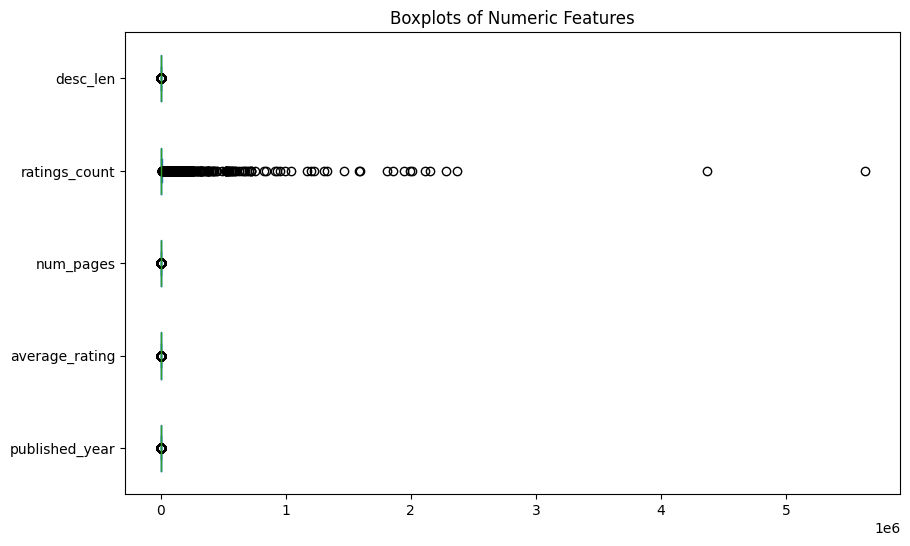

In [ ]:
import matplotlib.pyplot as plt

num_cols = ["published_year","average_rating","num_pages","ratings_count","desc_len"]
df[num_cols].plot.box(figsize=(10,6), vert=False)
plt.title("Boxplots of Numeric Features")
plt.show()


2. IQR-based Detection (rule of thumb)

What it does:

Flags any point outside 1.5×IQR from the quartiles.

Prints how many outliers each column has, and you can inspect outliers[col].



In [ ]:
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR

    mask = (df[col] < lower) | (df[col] > upper)
    outliers[col] = df[mask]
    print(f"{col}: {mask.sum()} outliers (values < {lower:.2f} or > {upper:.2f})")


published_year: 440 outliers (values < 1982.50 or > 2018.50)
average_rating: 158 outliers (values < 3.23 or > 4.67)
num_pages: 393 outliers (values < -110.00 or > 738.00)
ratings_count: 1023 outliers (values < -8591.25 or > 14742.75)
desc_len: 682 outliers (values < -321.50 or > 962.50)


3. Z-score Method (standard deviations from mean)

What it does:

Computes how many standard deviations each point is from its column mean; anything >3σ is “rare” in a normal distribution.

In [ ]:
# 1. Define your columns
num_cols = ["published_year","average_rating","num_pages","ratings_count","desc_len"]

# 2. Convert to numeric, coercing any bad values to NaN
num_df = df[num_cols].apply(pd.to_numeric, errors="coerce")

# 3. Impute NaNs with the column mean
num_df_imputed = num_df.fillna(num_df.mean())

# 4. Compute absolute z-scores
z_scores = np.abs(stats.zscore(num_df_imputed))

# 5. Any row with any feature > 3σ is an outlier
threshold = 3
outlier_mask = (z_scores > threshold).any(axis=1)
print("Rows flagged as outliers:", outlier_mask.sum())

# 6. Inspect those rows
outliers = df.loc[outlier_mask]
display(outliers[num_cols + ["title"]])


Rows flagged as outliers: 505


published_year  average_rating  num_pages  ratings_count  desc_len  \
58            2001.0            4.49     1546.0          187.0       243   
64            2002.0            4.49     1200.0          680.0       679   
69            2007.0            3.70      414.0        51219.0      1992   
99            1978.0            4.26     1425.0         1446.0         0   
102           1953.0            3.64       95.0          430.0         0   
...              ...             ...        ...            ...       ...   
6755          2004.0            2.44      152.0            6.0       165   
6788          2006.0            0.00      254.0            0.0         0   
6792          1999.0            4.11     1500.0          126.0       664   
6802          2003.0            2.93      324.0            0.0      1641   
6808          1981.0            0.00      210.0            0.0      1543   

                                                  title  
58                                The Lord of the Rings  
64                                The Lord of the Rings  
69                        The Yiddish Policemen's Union  
99    The Chronicles of Narnia: Lion, the witch and ...  
102                                   Reason in History  
...                                                 ...  
6755                                            Erotica  
6788             Enzyme-Catalyzed Synthesis of Polymers  
6792                                      War and Peace  
6802                                  Mistaken Identity  
6808                           The Berlin Phenomenology  

[505 rows x 6 columns]

4. Quantile Thresholding (extreme percentiles)

What it does:

Labels the bottom 1% and top 1% of values as potential outliers—easy to tune.

In [ ]:
for col in ["num_pages","ratings_count"]:
    low_perc, high_perc = df[col].quantile([0.01, 0.99])
    mask = (df[col] < low_perc) | (df[col] > high_perc)
    print(f"{col}: {mask.sum()} rows outside 1st/99th percentiles")


num_pages: 113 rows outside 1st/99th percentiles
ratings_count: 117 rows outside 1st/99th percentiles


5. Visual Cross-Check with Histograms / Scatter

Why: sometimes “outliers” by rule aren’t actually errors—they may be legitimate extremes. Always eyeball them!

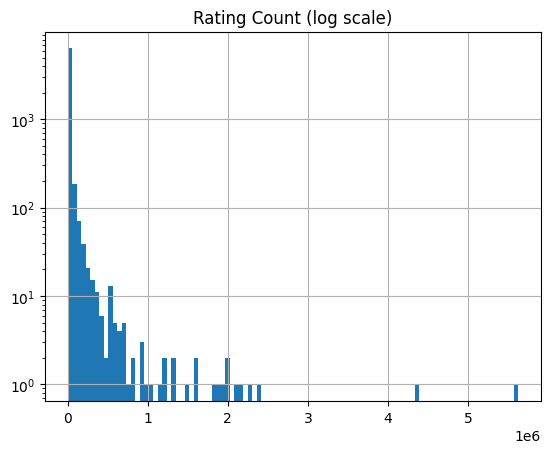

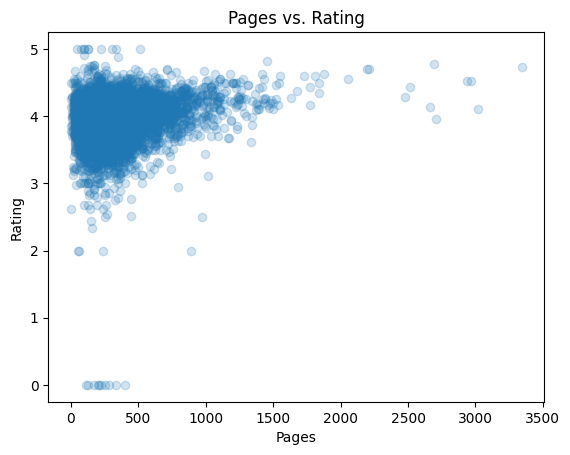

In [ ]:
# Histogram
df["ratings_count"].hist(bins=100, log=True)
plt.title("Rating Count (log scale)"); plt.show()

# Scatter e.g. pages vs. ratings
plt.scatter(df["num_pages"], df["average_rating"], alpha=0.2)
plt.title("Pages vs. Rating"); plt.xlabel("Pages"); plt.ylabel("Rating")
plt.show()


# Find columns with mixed Python types in their values

1. Quick dtype-based check

Insight: Anything in other_cols is e.g. datetime, boolean, category, or some exotic dtype.

In [ ]:
import pandas as pd
from pandas.api import types as ptypes

numeric_cols = [c for c in df.columns if ptypes.is_numeric_dtype(df[c])]
object_cols  = [c for c in df.columns if ptypes.is_object_dtype(df[c])]

other_cols = [c for c in df.columns
              if c not in numeric_cols
              and c not in object_cols]

print("Numeric columns:  ", numeric_cols)
print("Object columns:   ", object_cols)
print("Other dtypes cols:", other_cols)


Numeric columns:   ['isbn13', 'published_year', 'average_rating', 'num_pages', 'ratings_count', 'average_rating_rounded', 'desc_len']
Object columns:    ['isbn10', 'title', 'subtitle', 'authors', 'categories', 'thumbnail', 'description']
Other dtypes cols: []


Flags columns where some rows are str, others int, etc.—often the root cause if numeric columns were read as object.



In [ ]:
mixed_type_cols = []
for col in df.columns:
    # look at the actual Python types in the non-null values
    types_in_col = set(df[col].dropna().map(lambda x: type(x)).unique())
    if len(types_in_col) > 1:
        mixed_type_cols.append((col, types_in_col))

print("Columns with mixed value-types:")
for col, typeset in mixed_type_cols:
    print(f" • {col}: {typeset}")


Columns with mixed value-types:


# Summary

missing – number of nulls

duplicates – number of values beyond the first occurrence (i.e. s.duplicated().sum())

distinct – number of unique values

In [ ]:
import pandas as pd

# Compute summary statistics for each column
missing = df.isnull().sum()
duplicates = df.apply(lambda col: col.duplicated(keep=False).sum())
distinct = df.nunique()

summary = pd.DataFrame({
    "missing_count": missing,
    "duplicate_count": duplicates,
    "distinct_count": distinct
}).reset_index().rename(columns={"index": "column"})



In [ ]:
summary

column  missing_count  duplicate_count  distinct_count
0                   isbn13              0                0            6810
1                   isbn10              0                0            6810
2                    title              0              720            6398
3                 subtitle           4429             4872            2009
4                  authors             72             3945            3780
5               categories             99             6420             567
6                thumbnail            329              329            6481
7              description            262              389            6474
8           published_year              6             6791              94
9           average_rating             43             6782             200
10               num_pages             43             6545             915
11           ratings_count             43             3820            3881
12  average_rating_rounded             43             6808              30
13                desc_len              0             6317            1370

# HeatMap for missing values

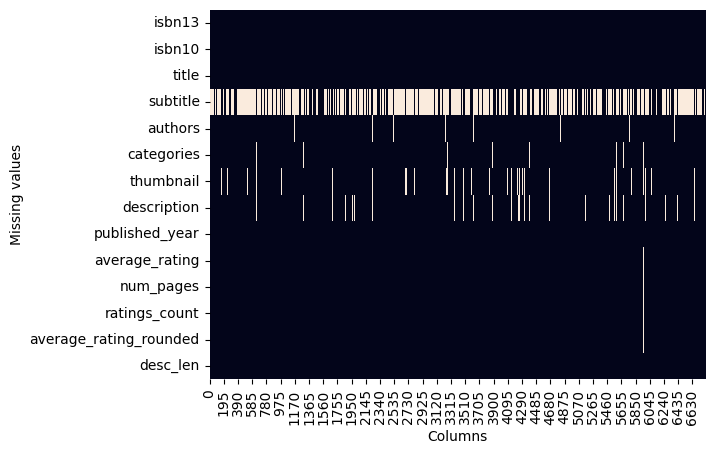

In [ ]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

Key insights

subtitle has the highest proportion of missing entries (a dense band of white lines) → many books lack a subtitle.

description and thumbnail also show moderate missingness (sparse white marks) → you’ll need to decide whether to drop, impute, or flag those rows.

categories has only a few missing rows.

Most other columns (e.g. isbn13, published_year, average_rating, num_pages, rating_count) are almost completely filled (all dark), indicating very few or zero missing values.


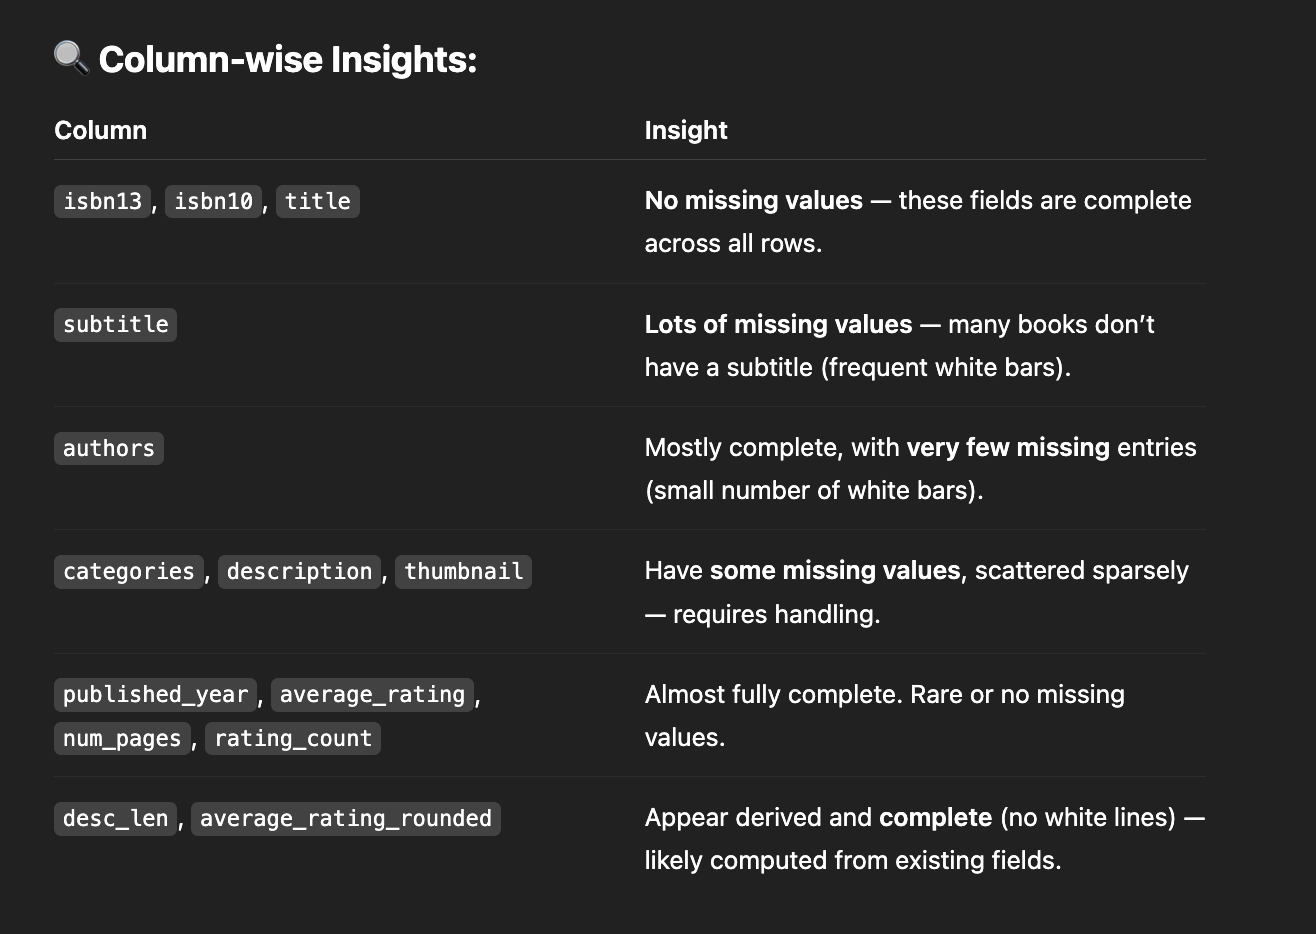


# Feature Engineering

### Description

Description is important because this is something we will be using for all NLP work. So it is important to know if we have some kind of bias here. Becuase we need to know if our recommendation system will skew towards certain books

We can use published year , average rating, number of pages and rating count

* missing_description

Creates a binary flag (1 or 0) that tells you whether each book is missing its description.

This lets you quantify “cold-start” cases in your text-based recommender.

* age_of_book

Computes how old each book is (in years), assuming you’re in 2025.

A useful feature if you suspect readers’ tastes change over eras (e.g. newer books get bumped up).



In [ ]:
import numpy as np

# Books where description are missing -> put zero else 1
df["missing_description"] = np.where(df["description"].isna(), 1, 0)

# change the published year to age of the book
df["age_of_book"] = 2025 - df["published_year"]

In [ ]:
df.head(5)

isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.google.com/books/content?id=FKo2T...   
4  http://books.google.com/books/content?id=XhQ5X...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2  Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   

   average_rating  num_pages  ratings_count  average_rating_rounded  desc_len  \
0            3.85      247.0          361.0                     3.8      1154   
1            3.83      241.0         5164.0                     3.8      1200   
2            3.97      479.0          172.0                     4.0       109   
3            3.93      512.0        29532.0                     3.9       359   
4            4.15      170.0        33684.0                     4.2       295   

   missing_description  age_of_book  
0                    0         21.0  
1                    0         25.0  
2                    0         43.0  
3                    0         32.0  
4                    0         23.0

Why Spearman?

It measures monotonic relationships (ranking order) rather than assuming linearity.

Robust to outliers and non-normal distributions—good when ratings or counts are skewed.



---



What the heatmap shows

Each cell gives you the Spearman ρ between a pair of features.

* +1.00 (deep red) means a perfect rising monotonic relationship.

* –1.00 (deep blue) means a perfect inverse monotonic relationship.

* 0.00 (white/neutral) means no consistent ranking trend.

By looking at, say, the intersection of

* num_pages vs. average_rating → do longer books tend to get higher or lower ratings?

* age_of_book vs. average_rating → are newer books more popular?

* missing_description vs. average_rating → does having no description correlate with lower ratings?



---



Why this matters

* Feature selection: drop or transform features that have little correlation with your target.

* Collinearity check: if num_pages and age_of_book are strongly correlated, you might avoid using both raw features together.

* Insight: it surfaces which engineered signals actually move in step with your users’ ratings.


---


In short:
We’re turning raw data into actionable signals (flags and computed ages), then using a non-parametric correlation metric to visualize how those signals relate to one another and to your target—a critical step before you feed features into any recommendation algorithm.

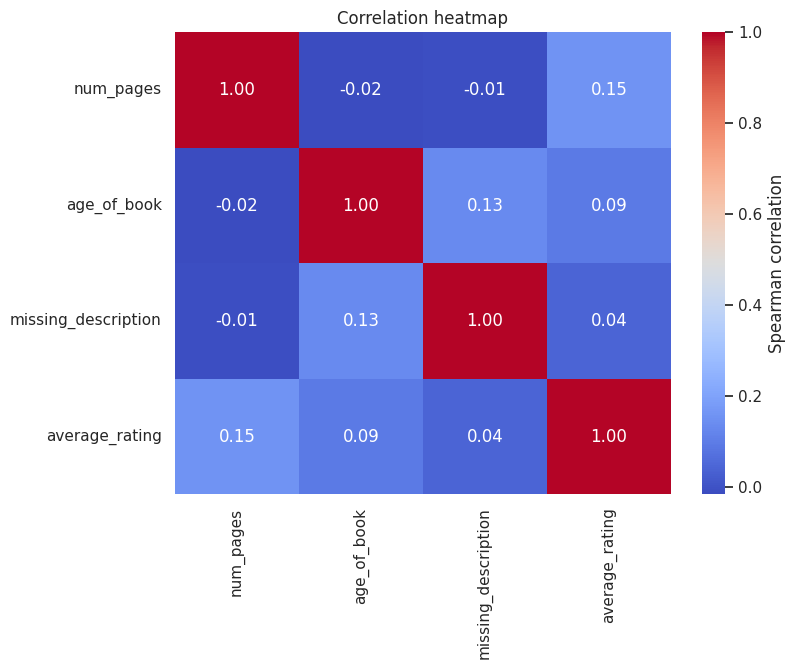

In [ ]:
# Subset of column
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = df[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm",
                      cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation heatmap")
plt.show()

## Pearson vs Spearman

We picked Spearman because it measures monotonic rank-based relationships rather than strictly linear ones. Here’s why that matters in our book data:

1. Non-linear but monotonic trends

E.g. as age_of_book increases, ratings might steadily decline, but not in a perfectly straight‐line way. Spearman will still pick up that “older books → lower ratings” ordering, whereas Pearson might under-estimate it if the drop isn’t linear.

2. Robustness to skew and outliers

Features like num_pages and rating_count are highly skewed (long tails). Pearson’s mean-and-σ approach can be thrown off by extreme outliers; Spearman ranks everything, so one 10 000-page outlier won’t dominate the correlation.

3. Mixed measurement scales

We created missing_description as a binary flag (0/1). Pearson assumes interval-level data and linearity; Spearman simply ranks 0 vs 1, capturing whether “having no description” tends to coincide with higher or lower ratings.



---



In short, when your variables are ordinal, non-normally distributed, prone to outliers, or related in a non-linear-but-consistent way, Spearman’s rank correlation gives you a more reliable picture of their true association than Pearson’s straight-line metric.

# Get books that have missing "num_pages", "age_of_book", "missing_description", "average_rating"

In [ ]:
df[
    (df["description"].isna()) |
    (df["num_pages"].isna()) |
    (df["average_rating"].isna()) |
    (df["published_year"].isna())
]


isbn13      isbn10  \
37    9780006906018  000690601X   
60    9780007127740  000712774X   
99    9780020442806  0020442807   
102   9780023513206  0023513209   
105   9780026995016  0026995018   
...             ...         ...   
6787  9783464371640  3464371646   
6788  9783540292128  3540292128   
6798  9787506435673  7506435675   
6806  9788185944609  8185944601   
6807  9788445074879  8445074873   

                                                  title  \
37                    The Princess of the Chalet School   
60                                  The illustrated man   
99    The Chronicles of Narnia: Lion, the witch and ...   
102                                   Reason in History   
105                                             Spandau   
...                                                 ...   
6787                                        About a Boy   
6788             Enzyme-Catalyzed Synthesis of Polymers   
6798                                         Good Fight   
6806                               Secrets Of The Heart   
6807                                     Fahrenheit 451   

                                               subtitle  \
37                                                  NaN   
60                                                  NaN   
99                                                  NaN   
102   A General Introduction to the Philosophy of Hi...   
105                                  The Secret Diaries   
...                                                 ...   
6787                                                NaN   
6788                                                NaN   
6798                                                NaN   
6806                                                NaN   
6807                                                NaN   

                                         authors        categories  \
37                        Elinor Mary Brent-Dyer  Juvenile Fiction   
60                                  Ray Bradbury           Fiction   
99                           Clive Staples Lewis       Fairy tales   
102                Georg Wilhelm Friedrich Hegel        Philosophy   
105                                 Albert Speer           History   
...                                          ...               ...   
6787                                 Nick Hornby               NaN   
6788  Shiro Kobayashi;Helmut Ritter;David Kaplan           Science   
6798                   Judd Winick;Matthew Clark  Juvenile Fiction   
6806                               Khalil Gibran         Mysticism   
6807                                Ray Bradbury      Book burning   

                                              thumbnail  \
37    http://books.google.com/books/content?id=EJcQP...   
60    http://books.google.com/books/content?id=kePql...   
99                                                  NaN   
102   http://books.google.com/books/content?id=BCvcY...   
105                                                 NaN   
...                                                 ...   
6787  http://books.google.com/books/content?id=PuDYw...   
6788  http://books.google.com/books/content?id=WXOym...   
6798  http://books.google.com/books/content?id=xGPZA...   
6806  http://books.google.com/books/content?id=XcrVp...   
6807                                                NaN   

                                            description  published_year  \
37                                                  NaN          2000.0   
60                                                  NaN          2002.0   
99                                                  NaN          1978.0   
102                                                 NaN          1953.0   
105                                                 NaN          1976.0   
...                                                 ...             ...   
6787                                                NaN          2002.0   
6788                    

In [ ]:
# columns to check
cols = ["description", "num_pages", "average_rating", "published_year"]

# total rows
total_rows = len(df)

# mask of rows with any missing in those cols
missing_any_mask = df[cols].isna().any(axis=1)
num_missing_any = missing_any_mask.sum()
num_complete_any = total_rows - num_missing_any

# overall stats
print(f"Total rows: {total_rows}")
print(f"Rows with ≥1 missing in {cols}: {num_missing_any} "
      f"({num_missing_any/total_rows*100:.2f}%)")
print(f"Rows complete for all {cols}: {num_complete_any} "
      f"({num_complete_any/total_rows*100:.2f}%)\n")

# per-column missing counts & percentages
missing_counts = df[cols].isna().sum()
missing_pct    = missing_counts / total_rows * 100
summary = pd.DataFrame({
    "missing_count": missing_counts,
    "missing_pct":   missing_pct
})
print("Per-column missing summary:")
display(summary)

Total rows: 6810
Rows with ≥1 missing in ['description', 'num_pages', 'average_rating', 'published_year']: 303 (4.45%)
Rows complete for all ['description', 'num_pages', 'average_rating', 'published_year']: 6507 (95.55%)

Per-column missing summary:


missing_count  missing_pct
description               262     3.847283
num_pages                  43     0.631424
average_rating             43     0.631424
published_year              6     0.088106

# Create dataframe to remove missing observations

In [ ]:
book_missing = df[~(df["description"].isna()) &
      ~(df["num_pages"].isna()) &
      ~(df["average_rating"].isna()) &
      ~(df["published_year"].isna())
]

In [ ]:
book_missing.shape

(6507, 16)

In [ ]:
print(6810 - 6507)

303


In [ ]:
# Compute summary statistics for each column
missing = book_missing.isnull().sum()
duplicates = book_missing.apply(lambda col: col.duplicated(keep=False).sum())
distinct = book_missing.nunique()

summary = pd.DataFrame({
    "missing_count": missing,
    "duplicate_count": duplicates,
    "distinct_count": distinct
}).reset_index().rename(columns={"index": "column"})

In [ ]:
summary

column  missing_count  duplicate_count  distinct_count
0                   isbn13              0                0            6507
1                   isbn10              0                0            6507
2                    title              0              657            6133
3                 subtitle           4226             4661            1915
4                  authors             63             3766            3629
5               categories             33             6136             531
6                thumbnail            214              214            6293
7              description              0              125            6434
8           published_year              0             6493              89
9           average_rating              0             6480             198
10               num_pages              0             6250             890
11           ratings_count              0             3552            3826
12  average_rating_rounded              0             6506              29
13                desc_len              0             6016            1359
14     missing_description              0             6507               1
15             age_of_book              0             6493              89

# Check Distribution of category

In [ ]:
unique_subcats = (
    book_missing["categories"]
    .str.split(";")          # split each string into a list
    .explode()               # turn each list element into its own row
    .str.strip()             # remove leading/trailing whitespace
    .dropna()                # drop any empty/null entries
    .unique()                # pull out the unique values
)
sorted(unique_subcats)

['87th Precinct (Imaginary place)',
 'Abandoned mines',
 'Aboriginal Australians',
 'Abused wives',
 'Accidents',
 'Acting',
 'Actors',
 'Actors and actresses',
 'Actresses',
 'Adirondack Mountains (N.Y.)',
 'Adjustment (Psychology)',
 'Adolescence',
 'Adult children',
 'Adult education',
 'Adultery',
 'Adventure fiction',
 'Adventure stories',
 'Adventure stories, American',
 'Adventure stories, English',
 'Aeneas (Legendary character)',
 'Aeronautics',
 'Africa, East',
 'African American men',
 'African American plantation owners',
 'African Americans',
 'African Americans in radio broadcasting',
 'Aged women',
 'Aging',
 'Agriculture',
 'Air pilots',
 'Aircraft accidents',
 'Airplane crash survival',
 'Alanna (Fictitious character : Pierce)',
 'Albigenses',
 'Alcestis (Greek mythology)',
 'Alcoholics',
 'Alienation (Social psychology)',
 'Allegories',
 'Alternative histories (Fiction)',
 "Alzheimer's disease",
 'Amazon River Region',
 'American Wit And Humour',
 'American drama',
 '

In [ ]:
# Category from most to least popular

book_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)

categories  count
0                       Fiction   2523
1              Juvenile Fiction    534
2     Biography & Autobiography    391
3                       History    258
4            Literary Criticism    164
..                          ...    ...
519  Adventure stories, English      1
518                     Germany      1
517                       Egypt      1
516                  Apartments      1
515                       Books      1

[531 rows x 2 columns]

In [ ]:
book_missing

isbn13      isbn10  \
0     9780002005883  0002005883   
1     9780002261982  0002261987   
2     9780006163831  0006163831   
3     9780006178736  0006178731   
4     9780006280897  0006280897   
...             ...         ...   
6803  9788173031014  8173031010   
6804  9788179921623  817992162X   
6805  9788185300535  8185300534   
6808  9789027712059  9027712050   
6809  9789042003408  9042003405   

                                                  title  \
0                                                Gilead   
1                                          Spider's Web   
2                                          The One Tree   
3                                        Rage of angels   
4                                        The Four Loves   
...                                                 ...   
6803                                Journey to the East   
6804  The Monk Who Sold His Ferrari: A Fable About F...   
6805                                          I Am that   
6808                           The Berlin Phenomenology   
6809                          'I'm Telling You Stories'   

                                            subtitle  \
0                                                NaN   
1                                            A Novel   
2                                                NaN   
3                                                NaN   
4                                                NaN   
...                                              ...   
6803                                             NaN   
6804                                             NaN   
6805             Talks with Sri Nisargadatta Maharaj   
6808                                             NaN   
6809  Jeanette Winterson and the Politics of Reading   

                                           authors  \
0                               Marilynne Robinson   
1                  Charles Osborne;Agatha Christie   
2                             Stephen R. Donaldson   
3                                   Sidney Sheldon   
4                              Clive Staples Lewis   
...                                            ...   
6803                                 Hermann Hesse   
6804                                  Robin Sharma   
6805  Sri Nisargadatta Maharaj;Sudhakar S. Dikshit   
6808                 Georg Wilhelm Friedrich Hegel   
6809                        Helena Grice;Tim Woods   

                         categories  \
0                           Fiction   
1     Detective and mystery stories   
2                  American fiction   
3                           Fiction   
4                    Christian life   
...                             ...   
6803              Adventure stories   
6804               Health & Fitness   
6805                     Philosophy   
6808                        History   
6809             Literary Criticism   

                                              thumbnail  \
0     http://books.google.com/books/content?id=KQZCP...   
1     http://books.google.com/books/content?id=gA5GP...   
2     http://books.google.com/books/content?id=OmQaw...   
3     http://books.google.com/books/content?id=FKo2T...   
4     http://books.google.com/books/content?id=XhQ5X...   
...                                                 ...   
6803  http://books.google.com/books/content?id=rq6JP...   
6804  http://books.google.com/books/content?id=c_7mf...   
6805  http://books.google.com/books/content?id=Fv_JP...   
6808  http://books.google.com/books/content?id=Vy7Sk...   
6809  http://books.google.com/books/content?id=2lVyR...   

                                            description  published_year  \
0     A NOVEL THAT READERS and critics have been eag...          2004.0   
1     A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2     Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3     A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4     Le

Index(['category', 'count'], dtype='object')
                    category  count
0                    Fiction   2523
1           Juvenile Fiction    534
2  Biography & Autobiography    391
3                    History    258
4         Literary Criticism    164


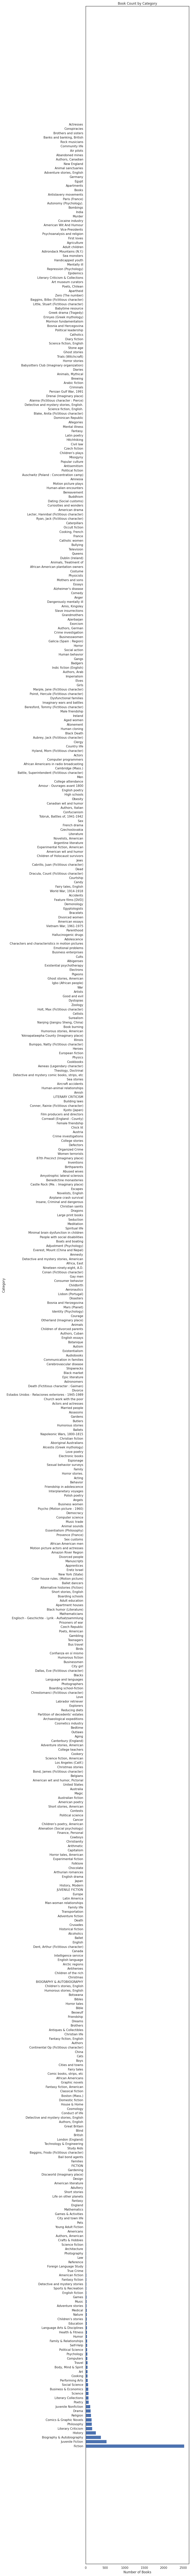

In [ ]:
# 1. Explode your multi-valued 'categories' column into one-row-per-category
cat_series = (
    book_missing["categories"]
      .dropna()            # drop empty
      .str.split(";")      # split into lists
      .explode()           # one row per entry
      .str.strip()         # trim whitespace
)

# 2. Count each category
cat_counts = (
    cat_series
      .value_counts()      # gives a Series indexed by category, vals=counts
      .reset_index()       # turn into DataFrame
)
# At this point the columns are ['index','categories']
# 3. Rename to something sensible
cat_counts.columns = ["category","count"]

# sanity check: do you see the right column names?
print(cat_counts.columns)
# and a preview:
print(cat_counts.head())

# 4. Plot
# 2. Prepare data
categories = cat_counts["category"]
counts     = cat_counts["count"]
n = len(categories)

# 3. Make a dynamically‐sized horizontal bar chart
fig, ax = plt.subplots(figsize=(10, n * 0.25))  # 0.25" per bar
ax.barh(categories, counts)
ax.set_xlabel("Number of Books")
ax.set_ylabel("Category")
ax.set_title("Book Count by Category")
plt.tight_layout()
plt.show()

Bottom line: your category space is highly imbalanced with a handful of superstar genres and a long tail of one-offs. You’ll want to reduce dimensionality—via thresholding, grouping, or embedding—to build a robust, generalizable recommendation system.

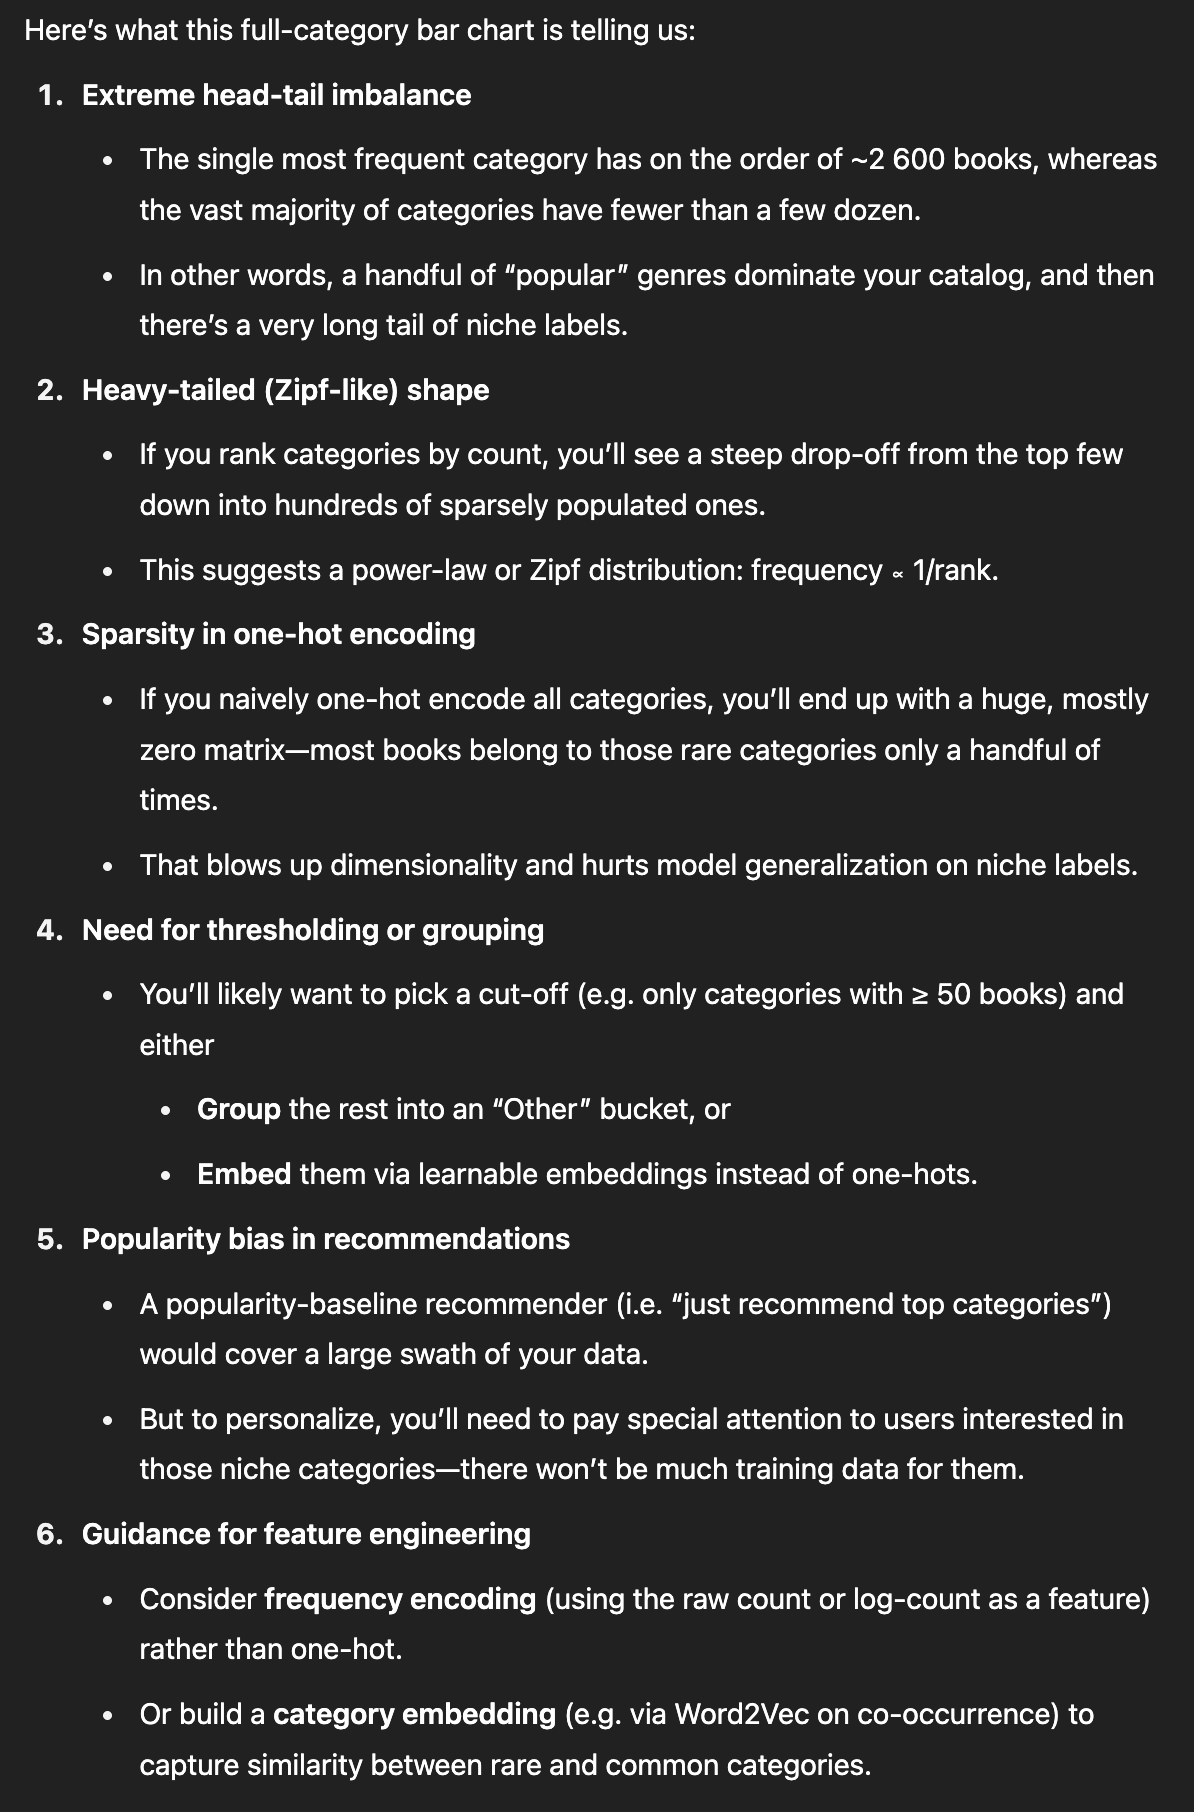

# Refining Description to be meaningful.

Smaller description doesnot carry necessary information that would be helpful in recommeding a book.

In [ ]:
# turn NaN into empty string
# split on whitespace
# count words

book_missing["words_in_description"] = book_missing["description"].str.split().str.len()

In [ ]:
book_missing.head(5)

isbn13      isbn10           title subtitle  \
0  9780002005883  0002005883          Gilead      NaN   
1  9780002261982  0002261987    Spider's Web  A Novel   
2  9780006163831  0006163831    The One Tree      NaN   
3  9780006178736  0006178731  Rage of angels      NaN   
4  9780006280897  0006280897  The Four Loves      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
2             Stephen R. Donaldson               American fiction   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
2  http://books.google.com/books/content?id=OmQaw...   
3  http://books.google.com/books/content?id=FKo2T...   
4  http://books.google.com/books/content?id=XhQ5X...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
2  Volume Two of Stephen Donaldson's acclaimed se...          1982.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   

   average_rating  num_pages  ratings_count  average_rating_rounded  desc_len  \
0            3.85      247.0          361.0                     3.8      1154   
1            3.83      241.0         5164.0                     3.8      1200   
2            3.97      479.0          172.0                     4.0       109   
3            3.93      512.0        29532.0                     3.9       359   
4            4.15      170.0        33684.0                     4.2       295   

   missing_description  age_of_book  words_in_description  
0                    0         21.0                   199  
1                    0         25.0                   205  
2                    0         43.0                    14  
3                    0         32.0                    57  
4                    0         23.0                    45

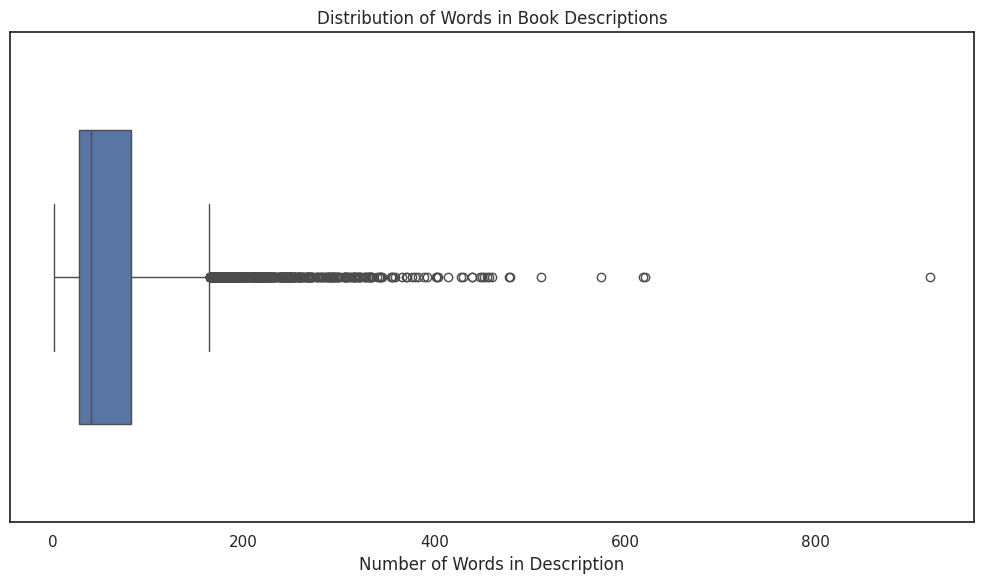

In [ ]:
# Draw a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(
    x="words_in_description",
    data=book_missing,
    width=0.6
)
plt.title("Distribution of Words in Book Descriptions")
plt.xlabel("Number of Words in Description")
plt.tight_layout()
plt.show()


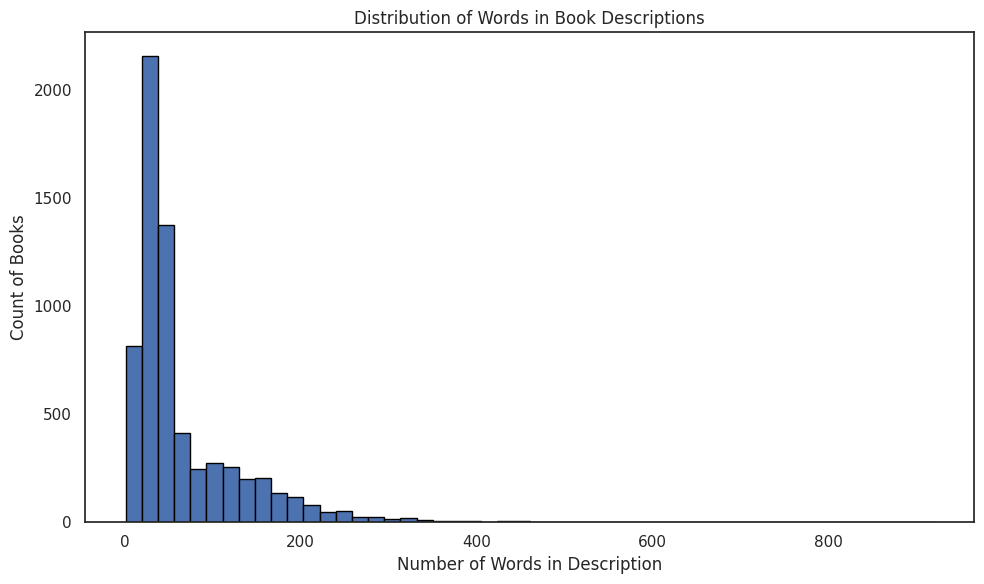

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(
    book_missing["words_in_description"],
    bins=50,
    edgecolor="black"
)
plt.title("Distribution of Words in Book Descriptions")
plt.xlabel("Number of Words in Description")   # X-axis label
plt.ylabel("Count of Books")                    # Y-axis label
plt.tight_layout()
plt.show()

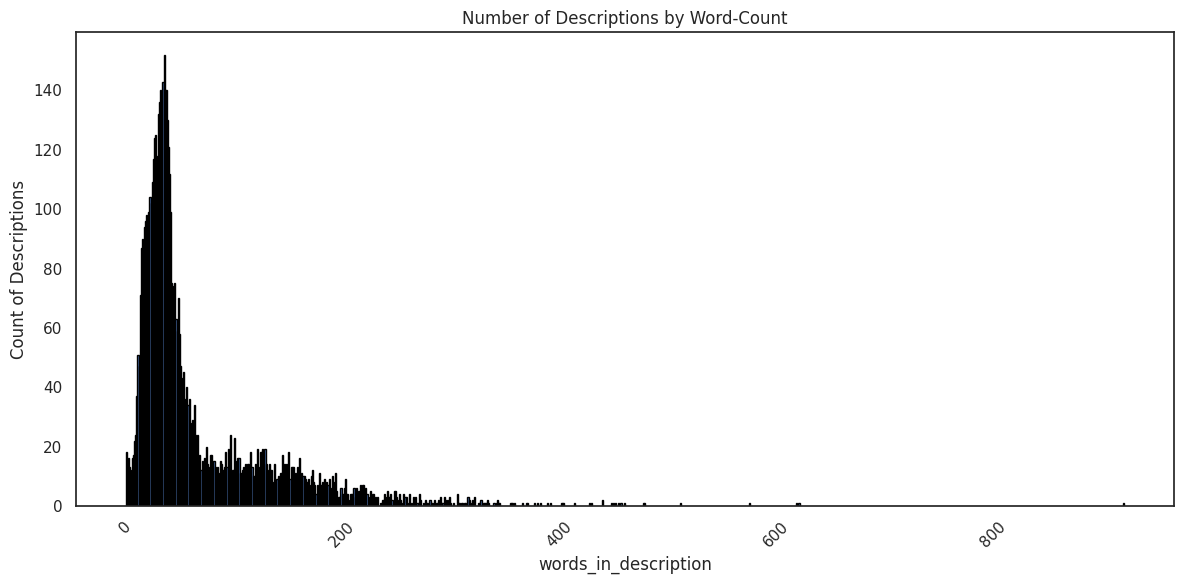

In [ ]:
# 2. Count how many descriptions have each length
counts = (
    book_missing["words_in_description"]
      .value_counts()   # counts per unique length
      .sort_index()     # order by ascending length
)

# 3. Plot
plt.figure(figsize=(12,6))
plt.bar(counts.index, counts.values, width=1.0, edgecolor="black")
plt.title("Number of Descriptions by Word-Count")
plt.xlabel("words_in_description")
plt.ylabel("Count of Descriptions")
plt.xticks(rotation=45)   # rotate if there are many distinct lengths
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
# 2. Plot an interactive histogram
fig = px.histogram(
    book_missing,
    x="words_in_description",
    nbins=50,
    template="plotly_dark",
    title="Distribution of Words in Book Descriptions",
    labels={
        "words_in_description": "words_in_description",
        "count": "count"
    }
)

fig.update_layout(
    xaxis_title="words_in_description",
    yaxis_title="count"
)

fig.show()

## Inspect description of different length

Each of those lines is filtering your DataFrame down to a specific bucket of description lengths, then pulling out just the description text so you can manually inspect what kinds of descriptions live in each bucket.



---


The broader goal:

By sampling descriptions in low-, mid-, and higher-word-count ranges, you can:

* Diagnose quality: very short ones might be junk or missing data; very long ones might be overly verbose or have HTML artifacts.

* Decide thresholds: choose a minimum word-count cutoff below which you drop or flag descriptions.

* Plan augmentation: know which buckets you need to enrich with extra metadata or NLP-based summaries.



---



In short, you’re stratifying your text data by length so you can qualitatively assess what’s going on in each segment and make informed cleaning or feature-engineering decisions.

What it does: grabs all rows where the description has 1–4 words and shows you their description field.

Why: descriptions that short are almost always uninformative (e.g. “…”) or placeholders. You want to see exactly what those look like so you can decide whether to drop or impute them.

In [ ]:
book_missing.loc[
  book_missing["words_in_description"].between(1, 4),
  "description"
]

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                                         Romance.
2089                               Oprah's Book Club.
2372                       KANDEL/IN SEARCH OF MEMORY
2946                           FICTION-ROMANCE/GOTHIC
3064                               No Marketing Blurb
3364                                   Fantasy-roman.
3425                               A novel of Israel.
3435                                 Science fiction.
3611                                Cast ages: adult.
3641                           A Classic Robot novel.
3645                           Science fiction-roman.
3857         Comprehensive Teacher's Guide available.
3959                                   Ketubot Part I
4262                             Issued in container.
4898                                   Fantasy roman.
5015                                             See:
5090                                                ?
5135                              (Autobiographical).
5161                          A classic rediscovered.
5243                                                .
5245                                                .
5332                               No Marketing Blurb
5493                         Motion, Sound, and Heat.
5505                                    Eventyrroman.
5599                                             #48.
5652                 see www.BloodMoonProductions.com
6066                               No Marketing Blurb
6144                             Dominion 3rd Edition
6180                                  Revised edition
6368                                        undefined
6402                           Meaning of life novel.
6499                                           Roman.
6557                                 Kriminalromaner.
6571                   Translated by Anthony Burgess.
6695                               No Marketing Blurb
6721                                          Horror.
6794                             源氏物語54帖、「宮田切り絵」の真骨頂。
Name: description, dtype: object

What it does: pulls all descriptions with 5–14 words.

Why: these are your “medium” descriptions—long enough to contain some info, but short enough that you might still consider augmenting them (e.g. with metadata).

In [ ]:
book_missing.loc[
  book_missing["words_in_description"].between(5, 14),
  "description"
]


2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

What it does: selects descriptions of 15–24 words.

Why: these are on the longer side—often your best, richest descriptions. You check them to verify they’re high-quality (no weird truncation or boilerplate).

In [ ]:
book_missing.loc[
  book_missing["words_in_description"].between(15, 24),
  "description"
]


10      One of Sidney Sheldon's most popular and bests...
32      Tells the story of three generations of Chines...
36      A magical and fantastic collection of early st...
57      A young drifter finds more than he bargained f...
68      A new 'The Doors of Perception' for the 21st c...
                              ...                        
6767    Everything from the fingerprints of the gods t...
6782    Displays one of America's leading physicist's ...
6783    Basics Illustration 01: Thinking Visually expl...
6789    Provides an introduction to the American artis...
6809    This is a jubilant and rewarding collection of...
Name: description, Length: 947, dtype: object

What it does: selects descriptions of 25–40 words.

Why: these are on the longer and safer side—often your best, richest descriptions. You check them to verify they’re high-quality (no weird truncation or boilerplate).

In [ ]:
book_missing.loc[
  book_missing["words_in_description"].between(25, 40),
  "description"
]

9       Kate Blackwell is an enigma and one of the mos...
14      Available in the U.S. for the first time, this...
20      It is 1937, and Charles Ashworth, a Canon to t...
21      Reissue of the author's most famous and well-l...
39      "The two works 'On fairy-stories' and 'Leaf by...
                              ...                        
6768    Citing a harrowing lack of adequate shelter an...
6775    Presents nearly one thousand recipes--from app...
6779    Edited by the creator and executive producer o...
6799    This book is the story of a young girl obsesse...
6801    Forster's lively, informed originality and wit...
Name: description, Length: 2055, dtype: object

# Create a dataframe with description length over 25

In [ ]:
book_missing_25_words = book_missing[book_missing["words_in_description"] >= 25]

In [ ]:
book_missing_25_words.head(5)

isbn13      isbn10                title subtitle  \
0  9780002005883  0002005883               Gilead      NaN   
1  9780002261982  0002261987         Spider's Web  A Novel   
3  9780006178736  0006178731       Rage of angels      NaN   
4  9780006280897  0006280897       The Four Loves      NaN   
5  9780006280934  0006280935  The Problem of Pain      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   
5              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
3  http://books.google.com/books/content?id=FKo2T...   
4  http://books.google.com/books/content?id=XhQ5X...   
5  http://books.google.com/books/content?id=Kk-uV...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   
5  "In The Problem of Pain, C.S. Lewis, one of th...          2002.0   

   average_rating  num_pages  ratings_count  average_rating_rounded  desc_len  \
0            3.85      247.0          361.0                     3.8      1154   
1            3.83      241.0         5164.0                     3.8      1200   
3            3.93      512.0        29532.0                     3.9       359   
4            4.15      170.0        33684.0                     4.2       295   
5            4.09      176.0        37569.0                     4.1       465   

   missing_description  age_of_book  words_in_description  
0                    0         21.0                   199  
1                    0         25.0                   205  
3                    0         32.0                    57  
4                    0         23.0                    45  
5                    0         23.0                    75

# Combining values:

There are lot of missing value in subtitle. Instead of deleteing them we can combine them with title like "title:subtitle"

this also makes sense because most often we see the title like that


This one-liner is doing a bit of on-the-fly feature engineering to give you a single “full title” field for each book:

1. np.where(…):

* Condition: book_missing_25_words["subtitle"].isna()

* If True (no subtitle) ➔ use just the title

* If False (subtitle exists) ➔ go to the next part


2. This turns, e.g.,
```
title    = "Deep Learning"
subtitle = "A Practitioner’s Approach"
into
```
```
"Deep Learning: A Practitioner’s Approach"
```

3. Assignment:

The result of that np.where is stored in a brand-new column called "title_and_subtitle".

4. Why we do this
* Unified text feature: downstream (e.g. NLP vectorization), it’s easier to work with one combined field rather than juggling two.

* Handles missing data: books lacking a subtitle still get a non-null “full title.”

* Richer context: concatenating subtitle can give your recommender more signal about genre, scope, or edition.

In [ ]:
book_missing_25_words["title_and_subtitle"] = (
    np.where(book_missing_25_words["subtitle"].isna(), book_missing_25_words["title"],
             book_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

In [ ]:
book_missing_25_words.head(5)

isbn13      isbn10                title subtitle  \
0  9780002005883  0002005883               Gilead      NaN   
1  9780002261982  0002261987         Spider's Web  A Novel   
3  9780006178736  0006178731       Rage of angels      NaN   
4  9780006280897  0006280897       The Four Loves      NaN   
5  9780006280934  0006280935  The Problem of Pain      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   
5              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
3  http://books.google.com/books/content?id=FKo2T...   
4  http://books.google.com/books/content?id=XhQ5X...   
5  http://books.google.com/books/content?id=Kk-uV...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   
5  "In The Problem of Pain, C.S. Lewis, one of th...          2002.0   

   average_rating  num_pages  ratings_count  average_rating_rounded  desc_len  \
0            3.85      247.0          361.0                     3.8      1154   
1            3.83      241.0         5164.0                     3.8      1200   
3            3.93      512.0        29532.0                     3.9       359   
4            4.15      170.0        33684.0                     4.2       295   
5            4.09      176.0        37569.0                     4.1       465   

   missing_description  age_of_book  words_in_description  \
0                    0         21.0                   199   
1                    0         25.0                   205   
3                    0         32.0                    57   
4                    0         23.0                    45   
5                    0         23.0                    75   

      title_and_subtitle  
0                 Gilead  
1  Spider's Web: A Novel  
3         Rage of angels  
4         The Four Loves  
5    The Problem of Pain

## Tagging description with unique identifier

This line is doing a simple “on-the-fly” concatenation of each book’s ISBN and its description, producing a single text field you can use for things like vectorization or search indexing.


Step by step

* Select the isbn13 and description columns for each row.

* Cast both values to strings (so you don’t get errors if one was numeric).

* .agg(" ".join, axis=1) walks across those two string values in each row and glues them together with a single space—e.g.



```
isbn13      = "9780143127741"
description = "A gripping tale of adventure..."
→ tagged_description = "9780143127741 A gripping tale of adventure..."

```

Why do this?

* Embedding or indexing the description alone means you lose any explicit reference to the book’s unique identifier. By tacking on the ISBN, you can always recover which document produced a particular embedding or search result.

* It also lets you include the ISBN as a “tag” you could later use as a weighted term if you want your search or retrieval model to pay special attention to that identifier.


In [ ]:
book_missing_25_words["tagged_description"] = book_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

In [ ]:
book_missing_25_words.head(5)

isbn13      isbn10                title subtitle  \
0  9780002005883  0002005883               Gilead      NaN   
1  9780002261982  0002261987         Spider's Web  A Novel   
3  9780006178736  0006178731       Rage of angels      NaN   
4  9780006280897  0006280897       The Four Loves      NaN   
5  9780006280934  0006280935  The Problem of Pain      NaN   

                           authors                     categories  \
0               Marilynne Robinson                        Fiction   
1  Charles Osborne;Agatha Christie  Detective and mystery stories   
3                   Sidney Sheldon                        Fiction   
4              Clive Staples Lewis                 Christian life   
5              Clive Staples Lewis                 Christian life   

                                           thumbnail  \
0  http://books.google.com/books/content?id=KQZCP...   
1  http://books.google.com/books/content?id=gA5GP...   
3  http://books.google.com/books/content?id=FKo2T...   
4  http://books.google.com/books/content?id=XhQ5X...   
5  http://books.google.com/books/content?id=Kk-uV...   

                                         description  published_year  \
0  A NOVEL THAT READERS and critics have been eag...          2004.0   
1  A new 'Christie for Christmas' -- a full-lengt...          2000.0   
3  A memorable, mesmerizing heroine Jennifer -- b...          1993.0   
4  Lewis' work on the nature of love divides love...          2002.0   
5  "In The Problem of Pain, C.S. Lewis, one of th...          2002.0   

   average_rating  num_pages  ratings_count  average_rating_rounded  desc_len  \
0            3.85      247.0          361.0                     3.8      1154   
1            3.83      241.0         5164.0                     3.8      1200   
3            3.93      512.0        29532.0                     3.9       359   
4            4.15      170.0        33684.0                     4.2       295   
5            4.09      176.0        37569.0                     4.1       465   

   missing_description  age_of_book  words_in_description  \
0                    0         21.0                   199   
1                    0         25.0                   205   
3                    0         32.0                    57   
4                    0         23.0                    45   
5                    0         23.0                    75   

      title_and_subtitle                                 tagged_description  
0                 Gilead  9780002005883 A NOVEL THAT READERS and critics...  
1  Spider's Web: A Novel  9780002261982 A new 'Christie for Christmas' -...  
3         Rage of angels  9780006178736 A memorable, mesmerizing heroine...  
4         The Four Loves  9780006280897 Lewis' work on the nature of lov...  
5    The Problem of Pain  9780006280934 "In The Problem of Pain, C.S. Le...

# Drop Columns and save the cleaned data

In [ ]:
(
    book_missing_25_words
    .drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis=1)
    .to_csv("cleanedData.csv", index = False)
)